In [165]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsRegressor
import random
import numpy as np
import numpy.matlib
import sklearn.svm


In [155]:
# loading separate datasets
mensdataset = read_csv('csv/mens_clothing.csv')
womensdataset = read_csv('csv/womens_clothing.csv')
othersdataset = read_csv('csv/other_clothing.csv')
#mensdataset.head()
#othersdataset.head()

In [156]:
scale = StandardScaler()

In [195]:
# preprocessing data
def preprocess(dataset,isTest):
    dropcolumns = ['ProductCategory','PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)']
    macrodataset = read_csv('csv/train_macro.csv')
    frames = [dataset, macrodataset]
    traindataset = pd.concat(frames,axis=1)
    traindataset = traindataset.drop(dropcolumns,axis=1)
    traindataset.fillna(0, inplace=True)
    datavalues = traindataset.values
    xvalues = datavalues[:,3:]
    yvalues = datavalues[:,2]
    xvalues = scale.fit_transform(xvalues)
    return train_test_split(xvalues, yvalues, test_size=0.2, random_state=100)


In [196]:
# models
def trainModel(x_train, y_train):    
    
    regr = linear_model.LinearRegression(normalize=True)
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    
    return regr

def knnModel(x_train,y_train, k):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(x_train, y_train)
    return neigh

def svrModel(x_train,y_train):
    tuned_model = sklearn.svm.SVR(kernel = 'linear',C=1)
    tuned_model.fit(x_train, y_train)
    return tuned_model


In [197]:
def drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict ):
    plt.figure()
    plt.subplot(311)
    plt.plot(meny_test,  color='black')
    plt.plot(men_predict, color='blue')
    plt.title('mens prediction')
    
    plt.subplot(312)
    plt.plot(womeny_test,  color='black')
    plt.plot(women_predict, color='blue')
    plt.title('womens prediction')
    
    plt.subplot(313)
    plt.plot(othersy_test,  color='black')
    plt.plot(other_predict, color='blue')
    plt.title('others prediction')
    plt.show()

In [198]:
isTest = False
menx_train, menx_test, meny_train, meny_test =  preprocess(mensdataset, isTest)
womenx_train, womenx_test, womeny_train, womeny_test =  preprocess(womensdataset,isTest )
othersx_train, othersx_test, othersy_train, othersy_test =  preprocess(othersdataset, isTest)
menx_train.shape,menx_test.shape,meny_train.shape,meny_test.shape

((57, 14), (15, 14), (57,), (15,))

men_rmse: 216.100 women_rmse: 802.870 others rmse: 571.250


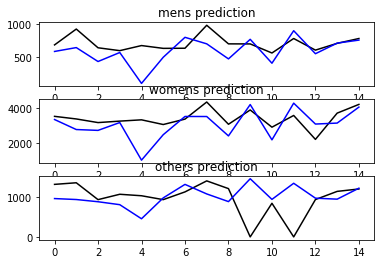

In [199]:
# checking with linear regression model
menregr = trainModel(menx_train,meny_train)
womenregr = trainModel(womenx_train,womeny_train)
othersregr = trainModel(othersx_train, othersy_train)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

men_rmse: 146.512 women_rmse: 557.139 others rmse: 466.450


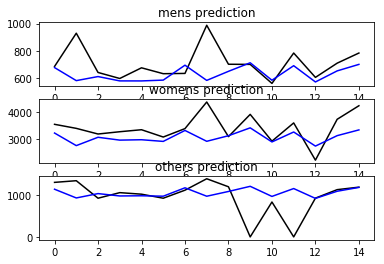

In [200]:
# checking with svr model
menregr = svrModel(menx_train,meny_train)
womenregr = svrModel(womenx_train,womeny_train)
othersregr = svrModel(othersx_train, othersy_train)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

In [203]:
# k-nn model
s = 9999999
best_k = 0
for epoch in range(1,20):
    k = random.randint(1,10)
    #k = epoch
    #print(k)
    menregr = knnModel(menx_train,meny_train,k)
    womenregr = knnModel(womenx_train,womeny_train,k)
    othersregr = knnModel(othersx_train, othersy_train,k)

    men_predict = menregr.predict(menx_test)
    women_predict = womenregr.predict(womenx_test)
    other_predict = othersregr.predict(othersx_test)

    men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
    women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
    other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
    ss = men_rmse + women_rmse + other_rmse
    if(ss < s):
        best_k = k
        s = ss
    #print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

print(best_k)


8


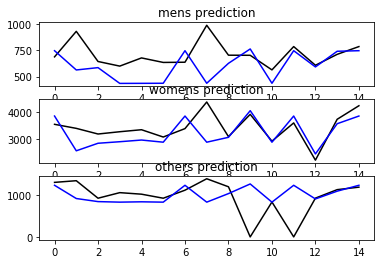

In [204]:
#best_k = 8
menregr = knnModel(menx_train,meny_train,best_k)
womenregr = knnModel(womenx_train,womeny_train,best_k)
othersregr = knnModel(othersx_train, othersy_train,best_k)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

In [205]:
testdata = pd.read_csv('csv/test_data.csv')
testMacroData = pd.read_csv('csv/test_macro.csv')

In [206]:
# repeating macro business data for 3 categories
def preprocessTestMacroData(testMacroData):
    dropcolumns = ['PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)', 'Year','Month','Year-Month']
    testMacroData = testMacroData.drop(dropcolumns,axis=1)

    testMacroData.fillna(0)
    finalData = np.zeros((3*testMacroData.values.shape[0],testMacroData.values.shape[1]),dtype = object)
    for i,row in enumerate(testMacroData.values):    
        x =  np.array(row)
        x = np.matlib.repmat(x,3,1)
        finalData[i*3:3*i+3] = x
    changed = pd.DataFrame(finalData, columns = testMacroData.columns)
    return changed

In [208]:
test_macro = preprocessTestMacroData(testMacroData)
frames = [testdata, test_macro]
testdataset = pd.concat(frames,axis=1)
mensdata = []
womensdata = []
othersdata = []
data = testdataset.values
#ata = scale.transform(data)
for row in data:
    if row[2] == 'WomenClothing':
        womensdata.append(row[4:])
    elif row[2] == 'MenClothing':
        mensdata.append(row[4:])
    else:
        othersdata.append(row[4:])
#rint(mensdata)
mensdata = scale.transform(mensdata)
womensdata = scale.transform(womensdata)
othersdata = scale.transform(othersdata)

men_predict = menregr.predict(mensdata)
women_predict = womenregr.predict(womensdata)
other_predict = othersregr.predict(othersdata)
predict = []
#rint(testdataset.values.shape)
for i in range(testdataset.values.shape[0]//3):
    predict.append(women_predict[i])
    predict.append(men_predict[i])
    predict.append(other_predict[i])

print(predict)
index = [i for i in range(1,37)]
out = [ [i+1, pred] for i,pred in enumerate(predict)]
output = pd.DataFrame(out,columns = ['Year','Sales(In ThousandDollars)'])
#originalData = testdataset.values[:,:3]
#testdata['Sales(In ThousandDollars)'] = predict
#testdataset
output.to_csv('csv/output.csv', sep=',', index=False)

[4450.375, 732.5, 1366.375, 4523.75, 732.875, 1372.375, 4523.75, 732.875, 1372.375, 4449.125, 685.0, 1338.25, 4111.25, 622.875, 1238.875, 4548.875, 734.125, 1366.875, 4283.875, 810.875, 1388.375, 4283.875, 810.875, 1388.375, 4283.875, 810.875, 1388.375, 4283.875, 810.875, 1388.375, 4283.875, 810.875, 1388.375, 4283.875, 810.875, 1388.375]
